## Images as arrays

When you scan a subject with MRI scanner, the images are first stored as **DICOM (Digital Imaging and Communications in Medicine)**.

As you see in the description here (https://en.wikibooks.org/wiki/Neuroimaging_Data_Processing/DICOM), most neuroimaging software tools convert them to a lighter, eaier-to-work-with format, **NIFTI**. So the first step in any neuroimaging processing is to convert DICOM to NIFTI format, using toos such as **dcm2nii**.

But reagardless of the file format, what you have to understand first is that images are simply **numerical arrays** that represent strength of a signal (i.e. intensity level) at a given point in space.

To demonstrate this, we will construct an array using **numpy** package and visualize it with **matplotlib** in python.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os.path as op

In [2]:
an_array = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
                     [ 0,  0,  0,  9, 99, 99, 94,  0],
                     [ 0,  0,  0, 25, 99, 99, 79,  0],
                     [ 0,  0,  0,  0,  0,  0,  0,  0],
                     [ 0,  0,  0, 56, 99, 99, 49,  0],
                     [ 0,  0,  0, 73, 99, 99, 31,  0],
                     [ 0,  0,  0, 91, 99, 99, 13,  0],
                     [ 0,  0,  9, 99, 99, 94,  0,  0],
                     [ 0,  0, 27, 99, 99, 77,  0,  0],
                     [ 0,  0, 45, 99, 99, 59,  0,  0],
                     [ 0,  0, 63, 99, 99, 42,  0,  0],
                     [ 0,  0, 80, 99, 99, 24,  0,  0],
                     [ 0,  1, 96, 99, 99,  6,  0,  0],
                     [ 0, 16, 99, 99, 88,  0,  0,  0],
                     [ 0,  0,  0,  0,  0,  0,  0,  0]])

We can check the size of the array.

In [3]:
an_array.shape

(15, 8)

We can show arrays as images using the plt.imshow command. This is the default output:

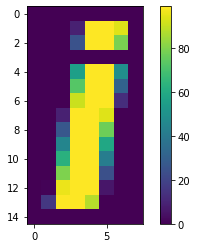

In [5]:
plt.imshow(an_array)
plt.colorbar()

We can change the colormap to gray, but the choice is arbitrary. You can choose any color map you like!

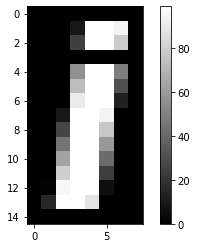

In [6]:
plt.imshow(an_array, cmap='gray')
plt.colorbar()

## NIFTI image

The above example is a small 2-dimensional array. Neuroimaging data are typically larger, and usually 3-D (anatomical image) or 4-D (3-D image with temporal axis).

The NIFTI image contains three basic components:
 
1. data array: this component is similar to an array above, except that it's 3-D or 4-D.
2. header: this component stores various meta-data about the image, like resolution, image size, etc.
3. affine: this component stores a transformation array that describes the relationship between data array and a reference space.

The concept of affine is described in detail here (https://nipy.org/nibabel/coordinate_systems.html), but basically it allows us to relate numbers in the data array (i, j, k) to a reference space, usually either a "real-world" scanner space or a standard template space (right-left, anterior-posterior, superior-inferior).

We can take a look at these components from the sample MRiShare data.

In [ ]:
my_data_dir = 'path_to_sample_data'
sample_T1 = op.join(my_data_dir, 'anat', 'SHARE0001_T1w.nii.gz')

We use nibabel package to load the sample T1 image.

In [8]:
import nibabel as nib

/homes_unix/tsuchida/anaconda2/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
sample_T1_img = nib.load(sample_T1)
type(sasmple_T1_img)

You can check the size of the image data directly:

In [9]:
sample_T1_img.shape

NameError: name 'sample_T1_img' is not defined

You can explore other attributes of this nibabel image object using tab completion after "sample_T1_img".

In [ ]:
sample_T1_img